#### Importer les bibliothéques

In [16]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 

from  sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split


#### Importer le dataset

In [3]:
df_poisson = pd.read_csv("D:/Projet_machine_learning/Data/datasetPoisson.csv")
df_poisson.head()

,Taille (cm),Vitesse (km/h),Espèce
0,5.197235,22.882152,0
1,3.896781,24.339018,0
2,-3.999748,24.594119,0
3,6.889950,15.684573,0
4,4.341219,25.322922,0


#### Analyser le dataset

In [8]:
print("ligne_class: ", df_poisson.shape , "taille :", df_poisson.size , "dimension : ", df_poisson.ndim)

ligne_class:  (3000, 3) taille : 9000 dimension :  2


In [10]:
df_poisson.dtypes

Taille (cm)       float64
Vitesse (km/h)    float64
Espèce              int64
dtype: object

In [9]:
df_poisson.isnull().sum()

Taille (cm)       0
Vitesse (km/h)    0
Espèce            0
dtype: int64

In [11]:
## voir la repartition 
df_poisson.describe()

,Taille (cm),Vitesse (km/h),Espèce
count,3000.000000,3000.000000,3000.000000
mean,25.053575,18.991338,1.000000
std,15.037948,13.881416,0.816633
min,-3.999748,-1.310831,0.000000
25%,6.332093,2.710075,0.000000
50%,31.058625,19.854255,1.000000
75%,37.034552,33.736580,2.000000
max,59.674017,40.214070,2.000000


In [13]:
df_poisson['Espèce'].value_counts()

Espèce
0    1000
1    1000
2    1000
Name: count, dtype: int64

#### Visualisation 

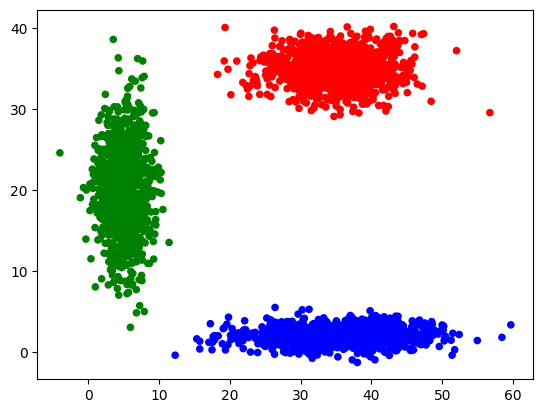

In [15]:
## presenter le dataset et voir la reparttion avant la creation du model

colorL = np.array(['green' , 'red' , 'blue'])

plt.scatter(df_poisson['Taille (cm)'] , df_poisson['Vitesse (km/h)'] , c= colorL[df_poisson['Espèce']], s= 20)

In [19]:
## on divise le dataset 

Y = df_poisson["Espèce"]
x = df_poisson.drop("Espèce" , axis=1)

#### utliser la methode de clustering pour voir si on aura le meme resultat(apprentissage non suppervise)

#####  Méthode du coude (Elbow method)

- calculer inertie 

In [20]:
inert = []

for i in range(1 , 11):
    model = KMeans(n_clusters= i)
    model.fit(x)
    inert.append(model.inertia_)

- tracer la courbe pour choisir le nombre de clusters(elbow_method)

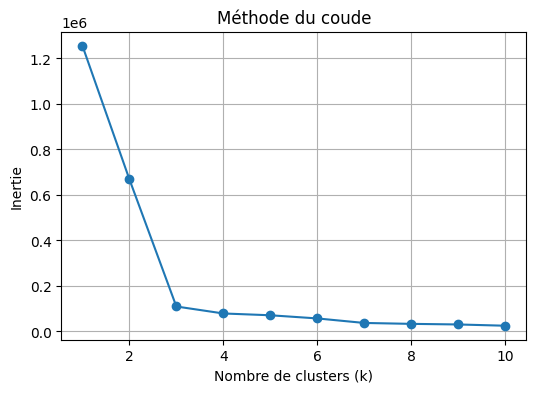

In [24]:
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), inert, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)
plt.savefig("../Images/elbow_method.png")

In [27]:
## Model KMeans 
model = KMeans(n_clusters=3)

## Entrainer le model
model.fit(x)

## prediction 
y_pred = model.predict(x)

y_pred


array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [28]:
## matrice de confusion 

print("Confusion Matrix:")
print(confusion_matrix(Y, y_pred))

Confusion Matrix:
[[   0    0 1000]
 [1000    0    0]
 [   0  999    1]]


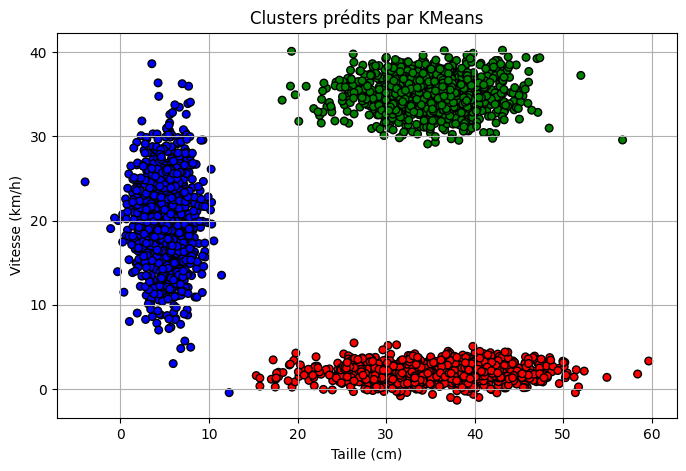

In [31]:
##  

colorL = np.array(['green' , 'red' , 'blue'])


plt.figure(figsize=(8, 5))
plt.scatter( df_poisson['Taille (cm)'] , df_poisson['Vitesse (km/h)']  , c= colorL[y_pred]  ,  s=30, edgecolor='k')
plt.xlabel("Taille (cm)")
plt.ylabel("Vitesse (km/h)")
plt.title("Clusters prédits par KMeans")
plt.grid(True)
plt.savefig("../Images/kmeans_clusters_poissons.png")
